## Predictive modelling 
### Week 4-2: Linear regression with full data processing

In [3]:
# libraries
import pandas as pd # process dataframe
import numpy as np # scientific calculation
import seaborn as sns # visualization complete stastistics
import matplotlib.pyplot as plt # visualization
from sklearn.preprocessing import MinMaxScaler # load scaler from sklearn
from sklearn.metrics import mean_squared_error # mse 
import missingno as msno # miss data visuals

import statsmodels.api as sm # statsmodels to build regression model

### 0. Dataset and some cleansing job

In [4]:
data = pd.read_csv('../cars_dataset/train-data.csv')
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
train_0 = data.drop(columns=['Unnamed: 0', 'New_Price'])

## Strings to float transformation
train_0['Mileage'] = train_0['Mileage']\
    .str.replace('km/kg','').str.replace('kmpl','').astype(float)
train_0['Engine'] = train_0['Engine'].str.replace('CC','').astype(float)
train_0['Power'] = train_0['Power']\
    .str.replace('bhp','').str.replace('null', '0').fillna('0').astype(float)

train_0.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


### 1. Train-test split

In [6]:
from sklearn.model_selection import train_test_split 

# perform train test split 
X_all = train_0.drop(columns=['Price'])
y_all = train_0[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size=0.3, 
                                                    random_state=42)

# check data size 
print('Training set size: ', len(X_train)) # 70% of total data
print('Test set size: ', len(X_test)) # 30% of total data

Training set size:  4213
Test set size:  1806


### 2. Check for outliers

In [7]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    outliers_poss = []
    
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_poss, inner_fence_le, inner_fence_ue 

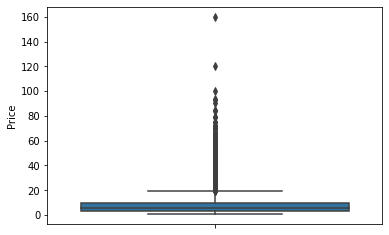

In [8]:
sns.boxplot(y=y_train['Price']);

In [9]:
# get information about Tukey's outliers. 

outlier_indices, lower_limit, upper_limit = tukeys_method(y_train,'Price')

print('The outlier index in the dataframe: ', outlier_indices)
print('Lower limit: ', lower_limit)
print('Upper limit: ', upper_limit)

The outlier index in the dataframe:  [5, 8, 15, 38, 43, 59, 77, 78, 85, 106, 110, 117, 119, 133, 152, 153, 162, 173, 182, 185, 192, 193, 196, 197, 209, 211, 216, 225, 235, 236, 240, 245, 246, 247, 251, 252, 270, 275, 277, 292, 296, 314, 328, 332, 340, 353, 358, 362, 363, 366, 374, 378, 387, 391, 394, 398, 407, 415, 417, 427, 432, 436, 439, 446, 457, 466, 478, 496, 497, 527, 533, 536, 547, 587, 599, 601, 603, 616, 617, 621, 628, 654, 672, 687, 688, 702, 706, 728, 738, 762, 767, 774, 776, 781, 787, 788, 794, 796, 797, 804, 807, 817, 821, 849, 883, 885, 905, 921, 922, 949, 958, 966, 972, 973, 996, 998, 1011, 1017, 1023, 1024, 1027, 1028, 1039, 1050, 1054, 1061, 1063, 1079, 1083, 1088, 1092, 1094, 1098, 1105, 1114, 1146, 1157, 1164, 1166, 1167, 1173, 1174, 1177, 1183, 1184, 1192, 1203, 1205, 1213, 1236, 1248, 1256, 1262, 1273, 1291, 1297, 1300, 1305, 1310, 1346, 1352, 1384, 1393, 1394, 1403, 1427, 1429, 1444, 1462, 1469, 1474, 1475, 1479, 1483, 1485, 1507, 1510, 1513, 1514, 1520, 1548, 155

In [10]:
# the price more than 19.5 will be excluded from the analysis
y_train_ul = y_train[y_train['Price']>19.5]

X_train = X_train.drop(index=y_train_ul.index)
y_train = y_train.drop(index=y_train_ul.index)
y_train.describe()

,Price
count,3716.000000
mean,6.122691
std,3.990794
min,0.440000
25%,3.250000
50%,5.100000
75%,7.727500
max,19.500000


### 3. Check for missing data

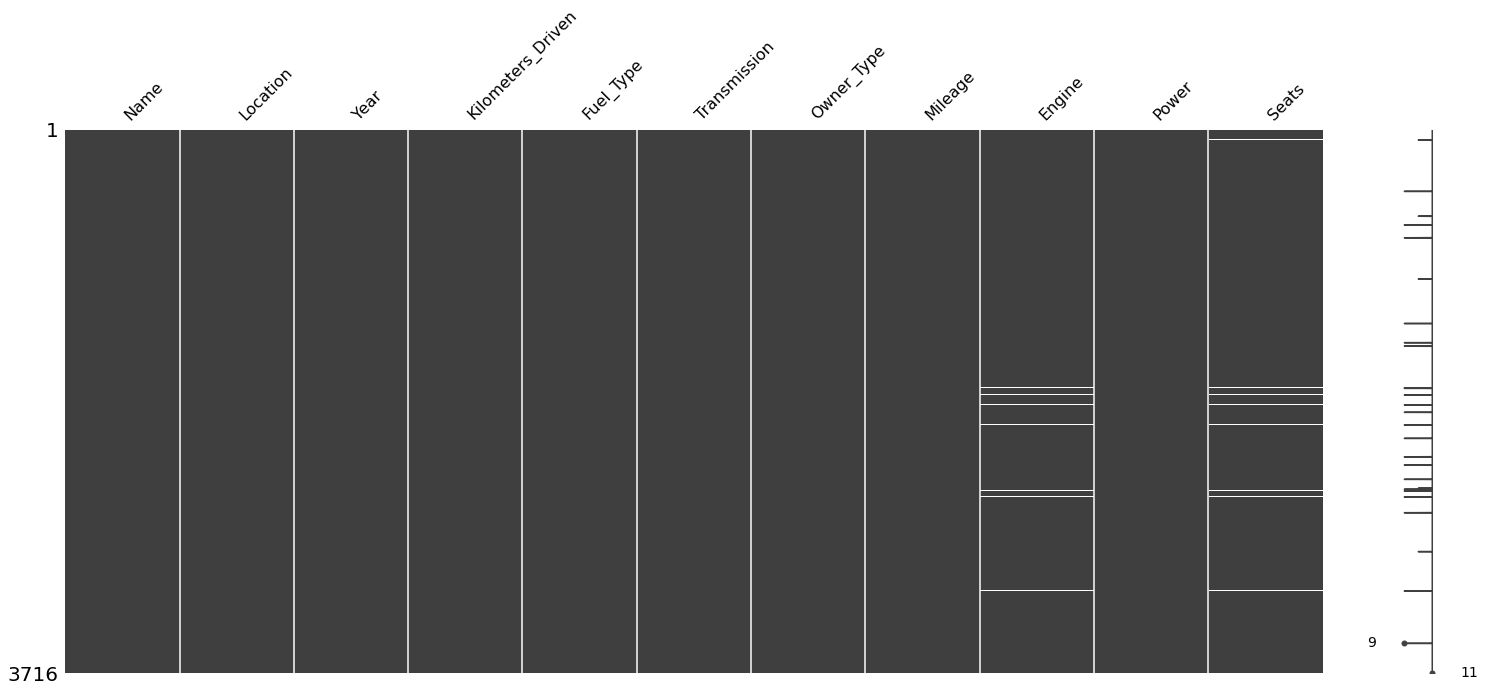

In [11]:
msno.matrix(X_train);

Mileage, Engine, Seats are missing

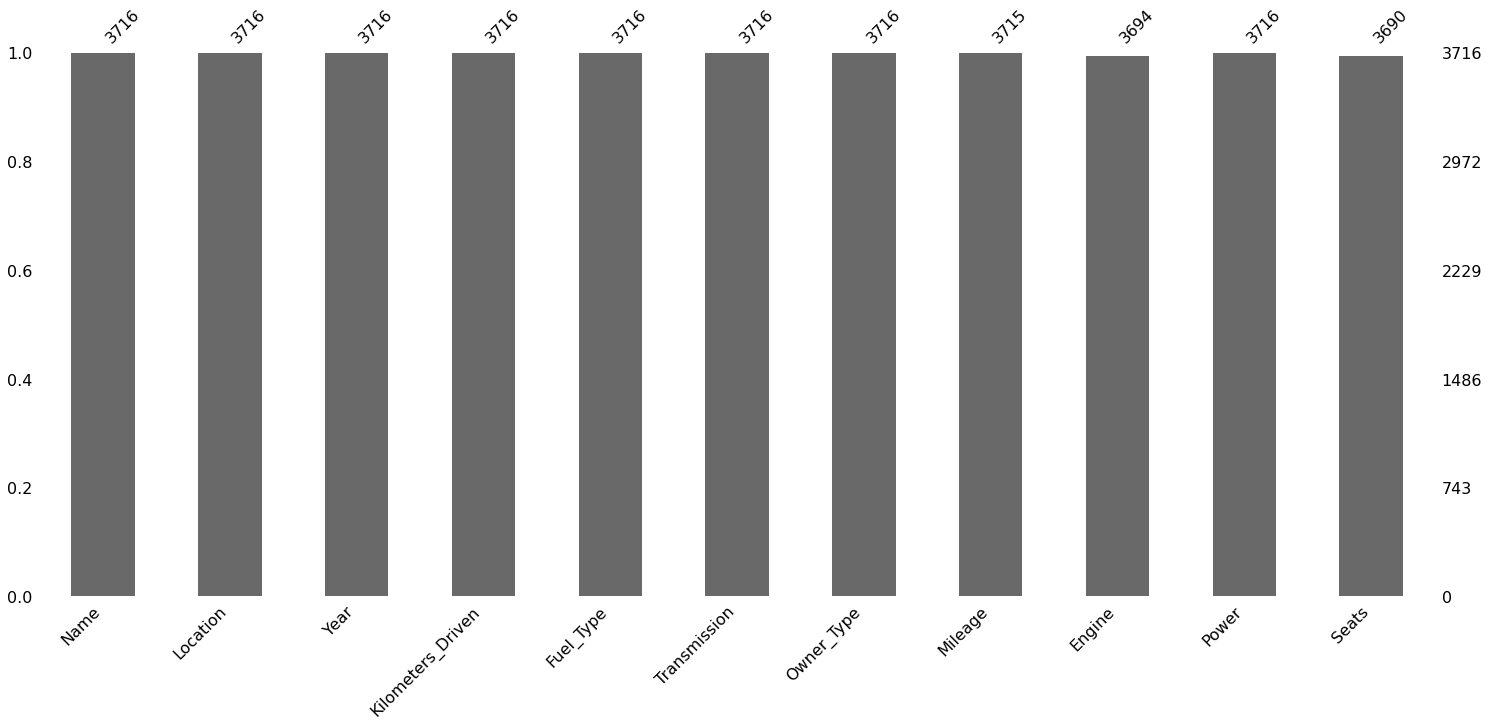

In [12]:
msno.bar(X_train);

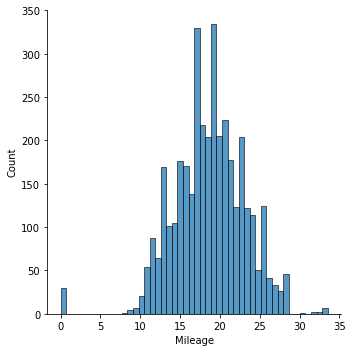

In [13]:
sns.displot(X_train['Mileage'])

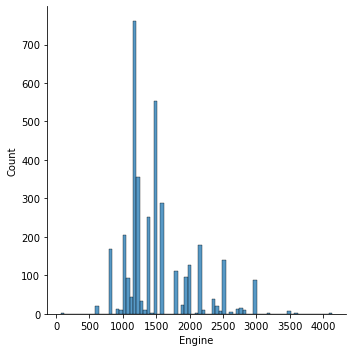

In [14]:
sns.displot(X_train['Engine'])

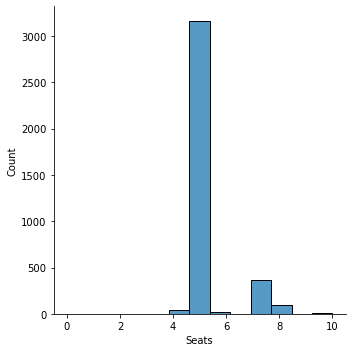

In [15]:
sns.displot(X_train['Seats'])

Imputing missing values
- Mileage: mean imputation
- Engine: median imputation
- Seats: mode imputation

In [16]:
X_train['Mileage'] = X_train['Mileage'].fillna(X_train['Mileage'].mean())
X_train['Engine'] = X_train['Engine'].fillna(X_train['Engine'].median())
X_train['Seats'] = X_train['Seats'].fillna(int(X_train['Seats'].mode()))

### 4. Year transformation
Assuming that the data was collected in 2021. So the age of the car will be 2021-year

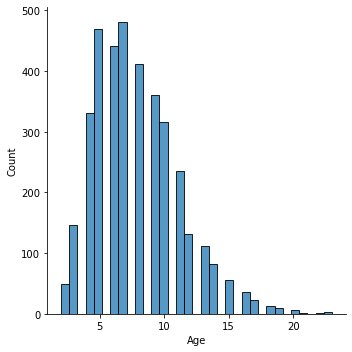

In [17]:
X_train['Age'] = 2021 - X_train['Year']
X_train = X_train.drop(columns=['Year'])

sns.displot(X_train['Age'])

### 5. Categorical transformation
We have 4 variables to be transformed. Let's check which ones are informative by plotting a box plot. <br>

In [18]:
_train = pd.concat([X_train, y_train], axis=1)
_train.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age,Price
4201,Volkswagen Polo Diesel Trendline 1.2L,Jaipur,77000,Diesel,Manual,First,22.07,1199.0,73.9,5.0,10,2.90
4383,Hyundai i10 Sportz,Hyderabad,19947,Petrol,Manual,First,20.36,1197.0,78.9,5.0,5,4.50
1779,Mahindra XUV500 W8 2WD,Kochi,70963,Diesel,Manual,First,15.10,2179.0,140.0,7.0,7,7.83
4020,Maruti Swift VDI BSIV,Kolkata,115195,Diesel,Manual,First,25.20,1248.0,74.0,5.0,8,3.85
3248,Volkswagen Polo Petrol Trendline 1.2L,Kochi,58752,Petrol,Manual,First,16.47,1198.0,73.9,5.0,10,3.32


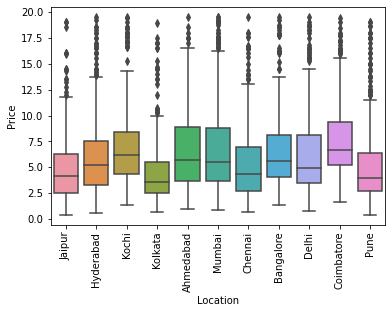

In [20]:
# Location
sns.boxplot(x='Location', y='Price', data=_train)
plt.xticks(rotation=90)
plt.show();

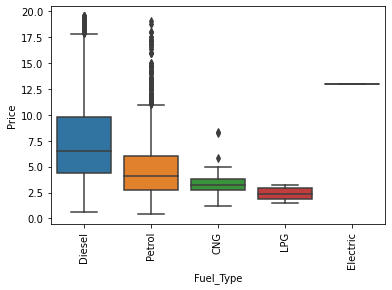

In [18]:
# Fuel_Type
sns.boxplot(x='Fuel_Type', y='Price', data=_train)
plt.xticks(rotation=90)
plt.show();

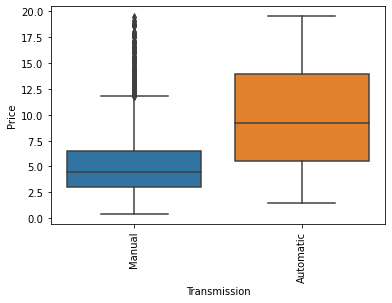

In [19]:
# Transmission
sns.boxplot(x='Transmission', y='Price', data=_train)
plt.xticks(rotation=90)
plt.show();

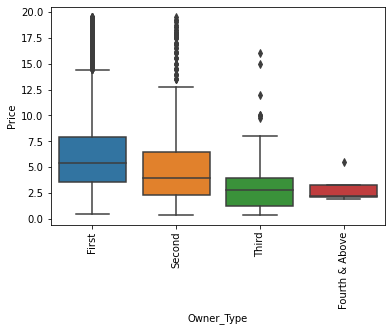

In [20]:
# Owner_Type
sns.boxplot(x='Owner_Type', y='Price', data=_train)
plt.xticks(rotation=90)
plt.show();

Next, one-hot encoding is used for tranforming these varibles

In [21]:
# encoding
Location_enc = pd.get_dummies(X_train[['Location']])
Fuel_Type_enc = pd.get_dummies(X_train[['Fuel_Type']])
Transmission_enc = pd.get_dummies(X_train[['Transmission']])
Owner_Type_enc = pd.get_dummies(X_train[['Owner_Type']])

display(Location_enc.head())
display(Fuel_Type_enc.head())
display(Transmission_enc.head())
display(Owner_Type_enc.head())

,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
4201,0,0,0,0,0,0,1,0,0,0,0
4383,0,0,0,0,0,1,0,0,0,0,0
1779,0,0,0,0,0,0,0,1,0,0,0
4020,0,0,0,0,0,0,0,0,1,0,0
3248,0,0,0,0,0,0,0,1,0,0,0


,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
4201,0,1,0,0,0
4383,0,0,0,0,1
1779,0,1,0,0,0
4020,0,1,0,0,0
3248,0,0,0,0,1


,Transmission_Automatic,Transmission_Manual
4201,0,1
4383,0,1
1779,0,1
4020,0,1
3248,0,1


,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
4201,1,0,0,0
4383,1,0,0,0
1779,1,0,0,0
4020,1,0,0,0
3248,1,0,0,0


In [22]:
# adding them back the training data 
X_train = X_train.drop(columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'])
X_train = pd.concat([X_train, Location_enc, Fuel_Type_enc, Transmission_enc, Owner_Type_enc], axis=1)
X_train.head()

,Name,Kilometers_Driven,Mileage,Engine,Power,Seats,Age,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
4201,Volkswagen Polo Diesel Trendline 1.2L,77000,22.07,1199.0,73.9,5.0,10,0,0,0,...,1,0,0,0,0,1,1,0,0,0
4383,Hyundai i10 Sportz,19947,20.36,1197.0,78.9,5.0,5,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1779,Mahindra XUV500 W8 2WD,70963,15.10,2179.0,140.0,7.0,7,0,0,0,...,1,0,0,0,0,1,1,0,0,0
4020,Maruti Swift VDI BSIV,115195,25.20,1248.0,74.0,5.0,8,0,0,0,...,1,0,0,0,0,1,1,0,0,0
3248,Volkswagen Polo Petrol Trendline 1.2L,58752,16.47,1198.0,73.9,5.0,10,0,0,0,...,0,0,0,1,0,1,1,0,0,0


### 6. Predictors normalization
We will be trying out the min-max scaler

In [23]:
# define data to be scaled 
x = X_train.drop(columns=['Name'])

scaler = MinMaxScaler() # instantiate the scaler
scaler_fit = scaler.fit(x) # fit the scaler on the data
x_sc = scaler_fit.transform(x) # tranform the data using the fitted scaler

display(x_sc) # the output of the tranformation is an array

array([[0.09865702, 0.65802027, 0.27744953, ..., 0.        , 0.        ,
        0.        ],
       [0.02498321, 0.60703637, 0.27695716, ..., 0.        , 0.        ,
        0.        ],
       [0.09086131, 0.45020871, 0.51871   , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18001033, 0.45020871, 0.51871   , ..., 0.        , 1.        ,
        0.        ],
       [0.09790031, 0.76923077, 0.35105859, ..., 0.        , 0.        ,
        0.        ],
       [0.12577479, 0.38163387, 0.596258  , ..., 0.        , 1.        ,
        0.        ]])

In [24]:
X_train = pd.DataFrame(x_sc, columns=x.columns)

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Kilometers_Driven          3716 non-null   float64
 1   Mileage                    3716 non-null   float64
 2   Engine                     3716 non-null   float64
 3   Power                      3716 non-null   float64
 4   Seats                      3716 non-null   float64
 5   Age                        3716 non-null   float64
 6   Location_Ahmedabad         3716 non-null   float64
 7   Location_Bangalore         3716 non-null   float64
 8   Location_Chennai           3716 non-null   float64
 9   Location_Coimbatore        3716 non-null   float64
 10  Location_Delhi             3716 non-null   float64
 11  Location_Hyderabad         3716 non-null   float64
 12  Location_Jaipur            3716 non-null   float64
 13  Location_Kochi             3716 non-null   float

### 7. Train the model

In [26]:
# fit the model
X = sm.add_constant(X_train)
y = y_train.reset_index(drop=True)
    
lr = sm.OLS(y, X).fit()

display(lr.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     392.4
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:10:35   Log-Likelihood:                -8060.4
No. Observations:                3716   AIC:                         1.617e+04
Df Residuals:                    3691   BIC:                         1.633e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         4.6388      0.358     12.972      0.000       3.938       5.340
Kilometers_Driven            -6.0025      0.846     -7.095      0.000      -7.661      -4.344
Mileage                      -4.9480      0.462    -10.708      0.000      -5.854      -4.042
Engine                        8.4997      0.724     11.744      0.000       7.081       9.919
Power                        10.0872      0.575     17.534      0.000       8.959      11.215
Seats                        -1.5041      0.609     -2.470      0.014      -2.698      -0.310
Age                         -10.6873      0.306    -34.896      0.000     -11.288     -10.087
Location_Ahmedabad            0.7487      0.169      4.430      0.000       0.417       1.080
Location_Bangalore            0.9713      0.144      6.725      0.000       0.688       1.255
Location_Chennai              0.3899      0.122      3.206      0.001       0.151       0.628
Location_Coimbatore           1.1160      0.117      9.553      0.000       0.887       1.345
Location_Delhi                0.0452      0.116      0.390      0.697      -0.182       0.272
Location_Hyderabad            0.7944      0.105      7.569      0.000       0.589       1.000
Location_Jaipur               0.3258      0.129      2.520      0.012       0.072       0.579
Location_Kochi                0.3873      0.112      3.470      0.001       0.168       0.606
Location_Kolkata             -0.6207      0.117     -5.323      0.000      -0.849      -0.392
Location_Mumbai               0.1381      0.103      1.337      0.181      -0.064       0.341
Location_Pune                 0.3429      0.107      3.200      0.001       0.133       0.553
Fuel_Type_CNG                -0.3728      0.512     -0.729      0.466      -1.376       0.630
Fuel_Type_Diesel              0.1698      0.430      0.395      0.693      -0.674       1.013
Fuel_Type_Electric            7.4471      1.759      4.234      0.000       3.999      10.896
Fuel_Type_LPG                -0.9763      0.733     -1.332      0.183      -2.414       0.461
Fuel_Type_Petrol             -1.6290      0.417     -3.904      0.000      -2.447      -0.811
Transmission_Automatic        3.3358      0.183     18.214      0.000       2.977       3.695
Transmission_Manual           1.3030      0.190      6.864      0.000       0.931       1.675
Owner_Type_First              1.4633      0.238      6.141      0.000       0.996       1.930
Owner_Type_Fourth & Above     0.9064      0.750      1.209      0.227      -0.563       2.376
Owner_Type_Second             1.2309      0.242      5.087      0.000       0.756       1.705
Owner_Type_Third              1.0383      0.297      3.498      0.000       0.456       1.620
===========================================================================

In [27]:
# get RMSE of the model
mse = lr.mse_total
rmse = np.sqrt(mse)
print(rmse)

3.9907942887356334


### 8. Test the model: DIY
8.1 Repeat the same processing steps on the test set <br>
8.2 Using the trained model to predict the price on the test set <br>
8.3 Report RMSE

In [28]:
# 8.1 repeat the  processing steps
## missing data imputation
## year to age transformation
## categorical transformation
## min-max scaling






In [29]:
# 8.2 apply the trained model on the test set







In [30]:
# 8.3 Report RMSE 
# print('Test RMSE: ', mean_squared_error(y_test, tst_pred, squared=False))





